In [2]:
import pandas as pd
import numpy as np

file_path = '/content/(user_item_matrix 150x20)(in).csv'
df = pd.read_csv(file_path, index_col=0)

data_matrix = df.replace(0, np.nan).values
num_users, num_items = data_matrix.shape

dataset_stats = {
    "Shape": df.shape,
    "Data Types": df.dtypes.to_dict(),
    "Missing Values": df.isnull().sum().sum(),
    "Summary": df.describe()
}

print("Dataset Shape:", dataset_stats["Shape"])
print("\nData Types:\n", dataset_stats["Data Types"])
print("\nDataset Summary:\n", dataset_stats["Summary"])
print("\nFirst 10 rows of the dataset:\n", df.head(10))

Dataset Shape: (150, 20)

Data Types:
 {'Movie 1': dtype('int64'), 'Movie 2': dtype('int64'), 'Movie 3': dtype('int64'), 'Movie 4': dtype('int64'), 'Movie 5': dtype('int64'), 'Movie 6': dtype('int64'), 'Movie 7': dtype('int64'), 'Movie 8': dtype('int64'), 'Movie 9': dtype('int64'), 'Movie 10': dtype('int64'), 'Movie 11': dtype('int64'), 'Movie 12': dtype('int64'), 'Movie 13': dtype('int64'), 'Movie 14': dtype('int64'), 'Movie 15': dtype('int64'), 'Movie 16': dtype('int64'), 'Movie 17': dtype('int64'), 'Movie 18': dtype('int64'), 'Movie 19': dtype('int64'), 'Movie 20': dtype('int64')}

Dataset Summary:
           Movie 1     Movie 2     Movie 3     Movie 4     Movie 5     Movie 6  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean     2.300000    2.420000    2.386667    2.540000    2.320000    2.480000   
std      1.681921    1.627243    1.725399    1.834165    1.660112    1.673801   
min      0.000000    0.000000    0.000000    0.000000    0.000000 

In [3]:
tnu = df.shape[0]
tni = df.shape[1]

print(f" Num of Users : {tnu}")
print(f" Num of Items : {tni}")

 Num of Users : 150
 Num of Items : 20


In [4]:
ratings_per_item = (df != 0).sum(axis=0)

print("Num of Ratings for Each Item:")
print(ratings_per_item)



Num of Ratings for Each Item:
Movie 1     117
Movie 2     124
Movie 3     119
Movie 4     116
Movie 5     121
Movie 6     124
Movie 7     140
Movie 8     128
Movie 9     126
Movie 10    130
Movie 11    121
Movie 12    118
Movie 13    113
Movie 14    119
Movie 15    148
Movie 16    133
Movie 17    113
Movie 18    118
Movie 19    107
Movie 20    110
dtype: int64


In [6]:
missing_ratings = (df == 0).sum(axis=1)

U1 = missing_ratings[missing_ratings == 2].index[0] if (missing_ratings == 2).any() else None
U2 = missing_ratings[missing_ratings == 3].index[0] if (missing_ratings == 3).any() else None
U3 = missing_ratings[missing_ratings == 5].index[0] if (missing_ratings == 5).any() else None

print(f" {U1}")
print(f" {U2}")
print(f" {U3}")

 5
 19
 2


In [7]:
total_users = df.shape[0]
missing_ratings_item = (df == 0).sum(axis=0)
missing_percentage = (missing_ratings_item / total_users) * 100

closest_4_percent_index = (missing_percentage - 4).abs().argmin()
closest_10_percent_index = (missing_percentage - 10).abs().argmin()


I1_closest = missing_percentage.index[closest_4_percent_index]
I2_closest = missing_percentage.index[closest_10_percent_index]

print("Target Items:")
print(f"Item with closest to 4% missing ratings (I1): {I1_closest} with {missing_percentage[I1_closest]:.2f}%")
print(f"Item with closest to 10% missing ratings (I2): {I2_closest} with {missing_percentage[I2_closest]:.2f}%")

Target Items:
Item with closest to 4% missing ratings (I1): Movie 15 with 1.33%
Item with closest to 10% missing ratings (I2): Movie 16 with 11.33%


In [8]:
active_users = [U1, U2, U3]

def count_co_rated_items(user, df):
    user_ratings = df.loc[user] > 0
    co_users = (df.loc[:, user_ratings] > 0).sum(axis=1) > 0
    co_rated_items = user_ratings.sum()
    return co_users.sum() - 1, co_rated_items

co_rated_stats = {}
for user in active_users:
    no_common_users, no_co_rated_items = count_co_rated_items(user, df)
    co_rated_stats[user] = {"No_common_users": no_common_users, "No_coRated_items": no_co_rated_items}


print("Co-rated Users and Items for Active Users:")
for user, stats in co_rated_stats.items():
    print(f"User {user}:")
    print(f"  Number of Common Users (No_common_users): {stats['No_common_users']}")
    print(f"  Number of Co-rated Items (No_coRated_items): {stats['No_coRated_items']}")

Co-rated Users and Items for Active Users:
User 5:
  Number of Common Users (No_common_users): 149
  Number of Co-rated Items (No_coRated_items): 18
User 19:
  Number of Common Users (No_common_users): 149
  Number of Co-rated Items (No_coRated_items): 17
User 2:
  Number of Common Users (No_common_users): 149
  Number of Co-rated Items (No_coRated_items): 15


In [10]:

no_common_users = [co_rated_stats[user]["No_common_users"] for user in active_users]
no_coRated_items = [co_rated_stats[user]["No_coRated_items"] for user in active_users]

sorted_stats = sorted(zip(no_common_users, no_coRated_items), key=lambda x: -x[0])

# Create a 2-D  array
co_rated_array = np.array(sorted_stats)

print("2-D Array (No_common_users, No_coRated_items):")
print(co_rated_array)




2-D Array (No_common_users, No_coRated_items):
[[149  18]
 [149  17]
 [149  15]]


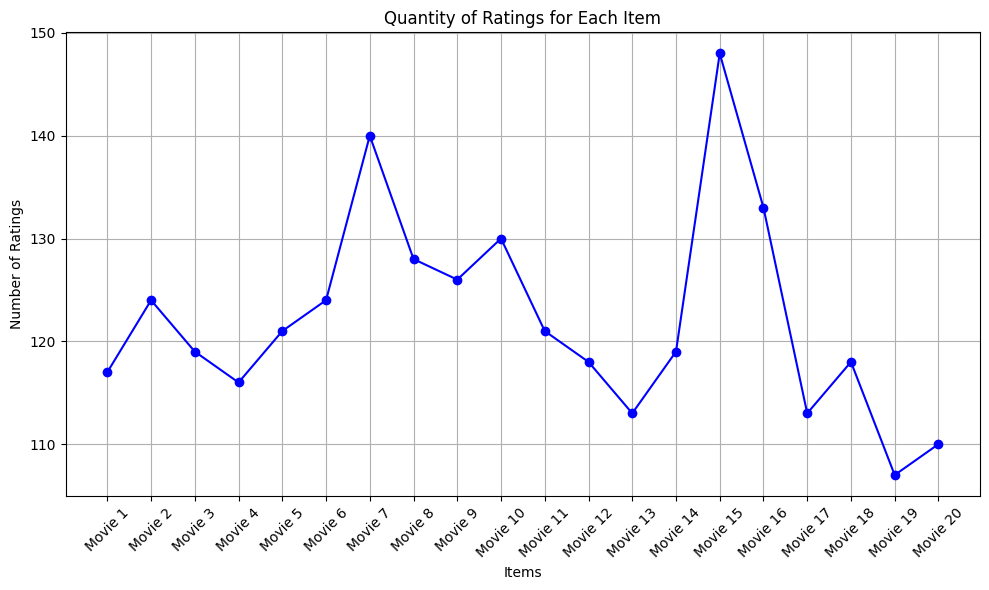

Curve saved as: ratings_quantity_curve.png


In [12]:
ratings_per_item = (df != 0).sum(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(ratings_per_item.index, ratings_per_item.values, marker='o', linestyle='-', color='b')
plt.title("Quantity of Ratings for Each Item")
plt.xlabel("Items")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plot_output_path = "ratings_quantity_curve.png"
plt.savefig(plot_output_path)

plt.show()

print(f"Curve saved as: {plot_output_path}")

In [13]:
def calculate_threshold_beta(user, df, percentage=0.3):
    user_rated_items = df.loc[user] > 0
    total_items_rated = user_rated_items.sum()

    threshold_items = int(percentage * total_items_rated)

    co_users = (df.loc[:, user_rated_items] > 0).sum(axis=1)
    max_users = (co_users >= threshold_items).sum() -1

    return max_users

threshold_beta = {}
for user in active_users:
    beta = calculate_threshold_beta(user, df, percentage=0.3)
    threshold_beta[user] = beta

print(" β for Each Active User:")
for user, beta in threshold_beta.items():
    print(f"User {user}: Threshold β = {beta}")

 β for Each Active User:
User 5: Threshold β = 149
User 19: Threshold β = 149
User 2: Threshold β = 149


In [15]:
def print_formatted_output(message, additional_info=""):
    print(f"{message}: {additional_info}")



In [16]:
from scipy.spatial.distance import cosine

def compute_cosine_similarity(user_matrix, active_user_idx):

    active_user = np.nan_to_num(user_matrix[active_user_idx])
    similarities = []
    for user_idx, user in enumerate(user_matrix):
        if user_idx != active_user_idx:
            sim = 1 - cosine(active_user, np.nan_to_num(user))
            similarities.append((user_idx, sim))
    return sorted(similarities, key=lambda x: x[1], reverse=True)

def top_20_percent(similarities):

    top_n = int(0.2 * len(similarities))
    return similarities[:top_n]

def predict_ratings(user_matrix, active_user_idx, top_users):

    active_user = user_matrix[active_user_idx]
    predictions = {}
    for item_idx in range(user_matrix.shape[1]):
        if np.isnan(active_user[item_idx]):
            num, den = 0, 0
            for user_idx, sim in top_users:
                if not np.isnan(user_matrix[user_idx][item_idx]):
                    num += sim * user_matrix[user_idx][item_idx]
                    den += abs(sim)
            predictions[item_idx] = num / den if den != 0 else 0
    return predictions

def compute_discounted_similarity(similarities, beta):

    return [(user_idx, sim * beta) for user_idx, sim in similarities]

results = {}
for active_user_idx in active_users:
    print_formatted_output(f"Processing Active User {active_user_idx}", "")

    # 1.1.1
    cosine_similarities = compute_cosine_similarity(data_matrix, active_user_idx)
    similarities_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in cosine_similarities[:5]])
    print_formatted_output("Top Cosine Similarities", similarities_output)

    # 1.1.2
    top_users = top_20_percent(cosine_similarities)
    top_users_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in top_users])
    print_formatted_output("Top 20% Closest Users", top_users_output)

    # 1.1.3
    predictions = predict_ratings(data_matrix, active_user_idx, top_users)
    predictions_output = "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in predictions.items()])
    print_formatted_output("Predicted Ratings for Missing Items", predictions_output)

    # 1.1.4
    beta = 0.8
    discounted_similarities = compute_discounted_similarity(top_users, beta)
    ds_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in discounted_similarities])
    print_formatted_output("Discounted Similarities", ds_output)

    # 1.1.5
    top_discounted_users = top_20_percent(discounted_similarities)
    top_ds_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in top_discounted_users])
    print_formatted_output("Top 20% Closest Users with Discounted Similarity", top_ds_output)

    # 1.1.6
    discounted_predictions = predict_ratings(data_matrix, active_user_idx, top_discounted_users)
    discounted_predictions_output = "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in discounted_predictions.items()])
    print_formatted_output("Predicted Ratings with Discounted Similarity", discounted_predictions_output)


    results[active_user_idx] = {
        "predictions": predictions,
        "discounted_predictions": discounted_predictions
    }


Processing Active User 5: 
Top Cosine Similarities: User 129: 0.8603
User 30: 0.8522
User 78: 0.8154
User 77: 0.8061
User 73: 0.8020
Top 20% Closest Users: User 129: 0.8603
User 30: 0.8522
User 78: 0.8154
User 77: 0.8061
User 73: 0.8020
User 82: 0.7892
User 119: 0.7885
User 148: 0.7884
User 136: 0.7759
User 48: 0.7721
User 33: 0.7693
User 53: 0.7693
User 93: 0.7682
User 104: 0.7666
User 118: 0.7663
User 56: 0.7594
User 120: 0.7590
User 100: 0.7574
User 45: 0.7553
User 57: 0.7493
User 83: 0.7469
User 36: 0.7466
User 24: 0.7449
User 101: 0.7449
User 12: 0.7429
User 130: 0.7418
User 25: 0.7407
User 140: 0.7406
User 90: 0.7373
Predicted Ratings for Missing Items: Movie 2: 2.95
Movie 5: 2.43
Movie 6: 2.41
Movie 17: 2.58
Discounted Similarities: User 129: 0.6882
User 30: 0.6818
User 78: 0.6523
User 77: 0.6449
User 73: 0.6416
User 82: 0.6314
User 119: 0.6308
User 148: 0.6307
User 136: 0.6207
User 48: 0.6176
User 33: 0.6154
User 53: 0.6154
User 93: 0.6146
User 104: 0.6132
User 118: 0.6130
User